# AS.171.205: Beautiful Data: Introduction to Practical Data Science
## Teacher: Alex Szalay
## Fall 2015
See also: http://www.sdss.jhu.edu/~szalay/class/2015/data.htm

For data files see:http://www.sdss.jhu.edu/~szalay/class/2015/data/

### Homework 2.1
http://www.sdss.jhu.edu/~szalay/class/2015/Homework-2.pdf

Consider the data set in file food.csv, describing the eating habits of the population England,
Wales, Scotland and Ireland. Calculate the Principal components and analyze the results.

In [3]:
import numpy as np
import pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
food=pandas.read_csv('food.csv',header=None,names=['Food','E','W','S','I'])
names=['E','W','S','I']
foods=list(range(len(food['Food'])))
mfood=food.as_matrix(columns=names)
mfoodT=mfood.T

In [5]:
pca = PCA(n_components=3,whiten=False)
pca.fit(mfoodT)


PCA(copy=True, n_components=3, whiten=False)

In [7]:
pca.fit_transform(mfoodT)

array([[-144.99315218,    2.53299944, -105.76894504],
       [-240.52914764,  224.64692488,   56.47555471],
       [ -91.869339  , -286.08178613,   44.41549498],
       [ 477.39163882,   58.90186182,    4.87789535]])

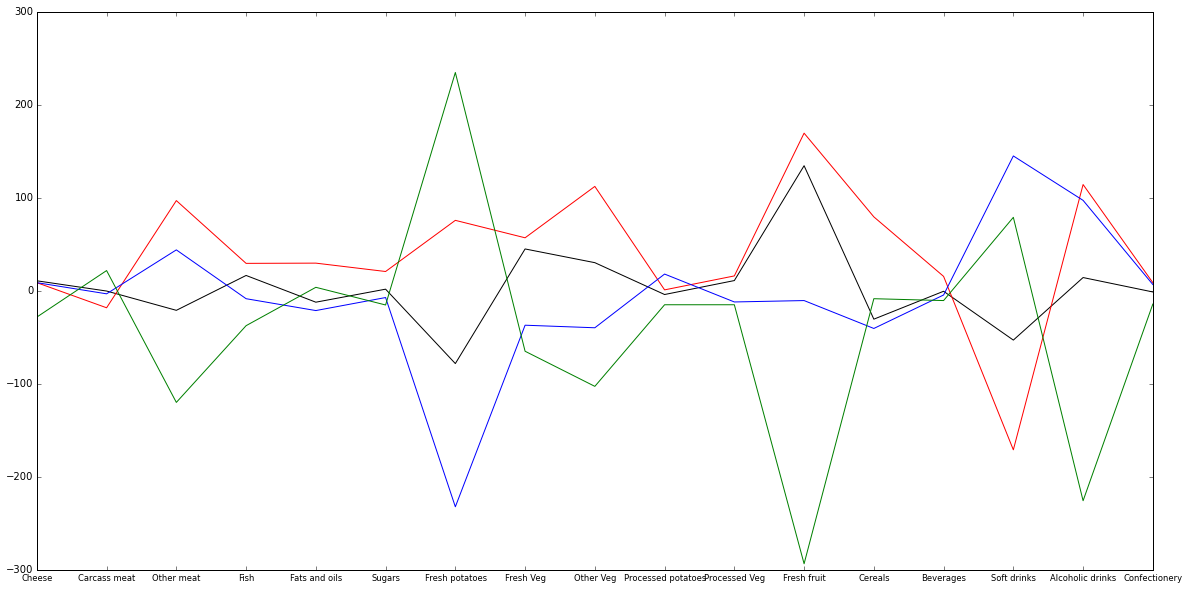

In [142]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10, forward=True)

plt.plot(foods,food['E']-pca.mean_,c='black')
plt.plot(foods,food['W']-pca.mean_,c='red')
plt.plot(foods,food['S']-pca.mean_,c='blue')
plt.plot(foods,food['I']-pca.mean_,c='green')
plt.xticks(range(len(food['Food'])), food['Food'], size='small')
plt.show()

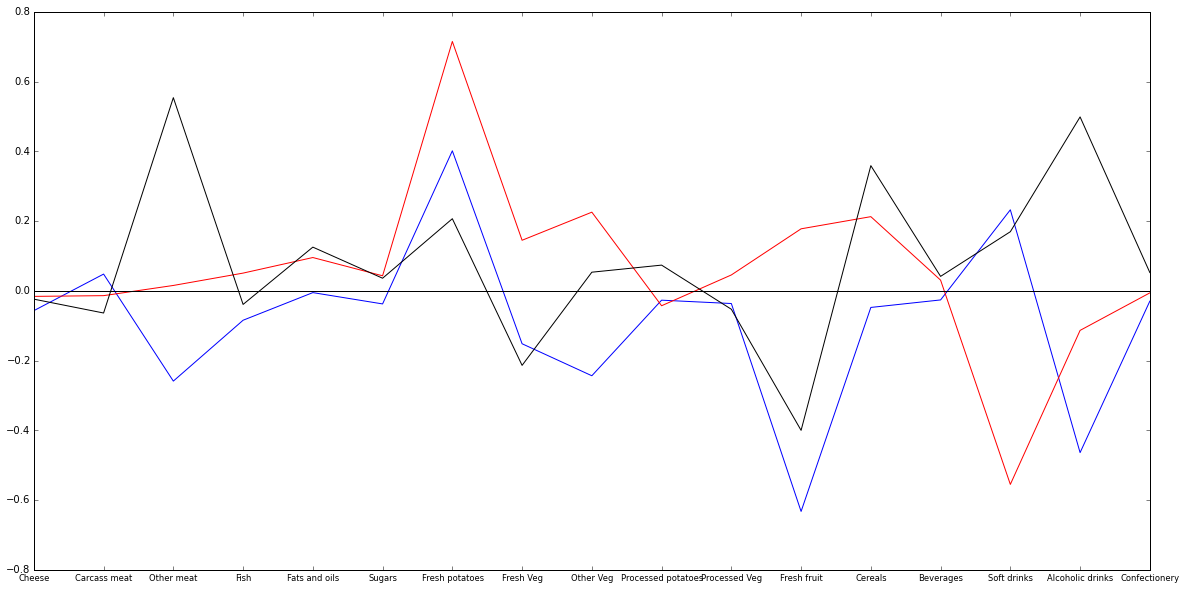

In [140]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10, forward=True)
plt.plot(foods,pca.components_[0],c='blue')
plt.plot(foods,pca.components_[1],c='red')
plt.plot(foods,pca.components_[2],c='black')
plt.xticks(foods, food['Food'], size='small')
plt.axhline(y=0,c="black")
plt.show()

In [169]:
amps=np.dot((mfoodT-pca.mean_),pca.components_.T)

In [167]:
amps

array([[-144.99315218, -240.52914764,  -91.869339  ,  477.39163882],
       [   2.53299944,  224.64692488, -286.08178613,   58.90186182],
       [-105.76894504,   56.47555471,   44.41549498,    4.87789535]])

In [176]:
(np.dot(amps,pca.components_)+pca.mean_)[3]-food['I']

0     0.000000e+00
1    -5.684342e-14
2     0.000000e+00
3    -1.421085e-14
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     0.000000e+00
8     0.000000e+00
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
14    0.000000e+00
15    8.526513e-14
16    7.105427e-15
Name: I, dtype: float64